In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/My Drive/Datathon/'

/content/gdrive/My Drive/Datathon


In [ ]:
%ls

 avg_data_with_dates.csv  'Ideas for Datathon.gdoc'
 correlations.ipynb       'Information for Project.gdoc'
 Data/                     kmeans_roles.ipynb
'Data Correlation.ipynb'   LC/
 glove.6B.100d.txt         mlp_isoc.pkl
 glove.6B.200d.txt        'Modelling Data.ipynb'
 glove.6B.300d.txt         Project.gdoc
 glove.6B.300d.txt.pt      roles_classifications.ipynb
 glove.6B.50d.txt         'Sentient Manalysis.ipynb'
 glove.6B.zip


In [ ]:
import pandas as pd

In [ ]:
from torchtext.vocab import GloVe
import nltk.data
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

###Import Data

In [ ]:
soc_roles_cleaned = pd.read_csv('./Data/soc_roles_cleaned.csv')

In [ ]:
soc_roles_cleaned.head(5)

,Major,Role,ID
0,Management Occupations,Chief Executives,11-1011
1,Management Occupations,General and Operations Managers,11-1021
2,Management Occupations,Legislators,11-1031
3,Management Occupations,Advertising and Promotions Managers,11-2011
4,Management Occupations,Marketing Managers,11-2021


In [ ]:
isco = pd.read_csv('./Data/isco_roles_fixed.csv')

In [ ]:
isco.head(5)

,code,role
0,1,Managers
1,1,"Chief Executives, Senior Officials and Legisla..."
2,1,Legislators and Senior Officials
3,1,Legislators
4,1,Senior Government Officials


In [ ]:
len(isco)

619

###GloVe Embeddings

In [ ]:
#mean glove embedding for employment
def get_average_glove_embedding(sentence):
    tokenized = nltk.word_tokenize(sentence.lower())
    # print(tokenized)
    vectors = [glove[word.lower()].numpy() for word in sentence.split()]
    # print(type(vectors), len(vectors), vectors[0].shape)
    vectors = np.mean(np.stack(vectors), axis=0)
    return vectors

In [ ]:
glove = GloVe(cache='.', name='6B')

###ISCO

In [ ]:
isco_glove_embeddings = [get_average_glove_embedding(post) for post in isco['role']]

In [ ]:
isco['glove'] = isco_glove_embeddings

In [ ]:
isco.head(5)

,code,role,glove
0,1,Managers,"[0.005505, 0.48871, 0.35066, -0.14942, 0.23206..."
1,1,"Chief Executives, Senior Officials and Legisla...","[-0.037935168, -0.03564866, 0.021365002, -0.23..."
2,1,Legislators and Senior Officials,"[-0.07460425, 0.100172006, 0.018434, -0.212082..."
3,1,Legislators,"[-0.16194, -0.34893, -0.063521, 0.033559, 0.25..."
4,1,Senior Government Officials,"[-0.04982433, 0.22908334, -0.076680005, -0.068..."


###SOC

In [ ]:
soc_glove_embeddings = [get_average_glove_embedding(post) for post in soc_roles_cleaned['Role']]

In [ ]:
soc_roles_cleaned['glove'] = soc_glove_embeddings

In [ ]:
soc_roles_cleaned.head(5)

,Major,Role,ID,glove
0,Management Occupations,Chief Executives,11-1011,"[0.117118, -0.22904499, 0.02496085, -0.4065799..."
1,Management Occupations,General and Operations Managers,11-1021,"[-0.13163474, 0.19221124, 0.35658422, -0.46561..."
2,Management Occupations,Legislators,11-1031,"[-0.16194, -0.34893, -0.063521, 0.033559, 0.25..."
3,Management Occupations,Advertising and Promotions Managers,11-2011,"[0.04622025, 0.3980795, 0.27422956, -0.1241697..."
4,Management Occupations,Marketing Managers,11-2021,"[0.0650725, 0.50118, 0.23427, -0.109648496, 0...."


In [ ]:
major_occupations = list(sorted(set(soc_roles_cleaned['Major'])))

In [ ]:
major_occupations

['Architecture and Engineering Occupations',
 'Arts, Design, Entertainment, Sports, and Media Occupations',
 'Building and Grounds Cleaning and Maintenance Occupations',
 'Business and Financial Operations Occupations',
 'Community and Social Service Occupations',
 'Computer and Mathematical Occupations',
 'Construction and Extraction Occupations',
 'Educational Instruction and Library Occupations',
 'Farming, Fishing, and Forestry Occupations',
 'Food Preparation and Serving Related Occupations',
 'Healthcare Practitioners and Technical Occupations',
 'Healthcare Support Occupations',
 'Installation, Maintenance, and Repair Occupations',
 'Legal Occupations',
 'Life, Physical, and Social Science Occupations',
 'Management Occupations',
 'Military Specific Occupations',
 'Office and Administrative Support Occupations',
 'Personal Care and Service Occupations',
 'Production Occupations',
 'Protective Service Occupations',
 'Sales and Related Occupations',
 'Transportation and Material M

In [ ]:
len(major_occupations)

23

In [ ]:
def convert(lst):
    res_dct = {lst[i]: i for i in range(0, len(lst))}
    return res_dct

In [ ]:
occupations_dict = convert(major_occupations)

In [ ]:
occupations_as_nums = [occupations_dict[x] for x in soc_roles_cleaned['Major']]

In [ ]:
soc_roles_cleaned['major_nums'] = occupations_as_nums

In [ ]:
soc_roles_cleaned.insert(1, 'major_nums', soc_roles_cleaned.pop('major_nums'))
soc_roles_cleaned

,Major,major_nums,Role,ID,glove
0,Management Occupations,15,Chief Executives,11-1011,"[0.117118, -0.22904499, 0.02496085, -0.4065799..."
1,Management Occupations,15,General and Operations Managers,11-1021,"[-0.13163474, 0.19221124, 0.35658422, -0.46561..."
2,Management Occupations,15,Legislators,11-1031,"[-0.16194, -0.34893, -0.063521, 0.033559, 0.25..."
3,Management Occupations,15,Advertising and Promotions Managers,11-2011,"[0.04622025, 0.3980795, 0.27422956, -0.1241697..."
4,Management Occupations,15,Marketing Managers,11-2021,"[0.0650725, 0.50118, 0.23427, -0.109648496, 0...."
...,...,...,...,...,...
862,Military Specific Occupations,16,Artillery and Missile Crew Members,55-3014,"[-0.1585248, 0.1550436, 0.082463495, -0.312161..."
863,Military Specific Occupations,16,Command and Control Center Specialists,55-3015,"[0.060831208, -0.026549792, 0.23401363, -0.193..."
864,Military Specific Occupations,16,Infantry,55-3016,"[-0.4615, 0.10704, -0.19839, -0.27378, -0.9027..."
865,Military Specific Occupations,16,Special Forces,55-3018,"[-0.37901998, 0.1643, 0.238468, 0.041729998, -..."


###Classifiers

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import plot_confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
# train_data, dev_data, train_y, dev_y = train_test_split(soc_roles_cleaned['glove'], soc_roles_cleaned['major_nums'], test_size=0.1, random_state=42)
train_data, dev_data, train_y, dev_y = train_test_split(isco['glove'], isco['code'], test_size=0.2, random_state=40)

In [ ]:
train_data = list(train_data)
dev_data = list(dev_data)

In [ ]:
train_y = list(train_y)
dev_y = list(dev_y)

In [ ]:
def eval(model):
    model.fit(train_data, train_y)
    train_y_pred = model.predict(train_data)

    # print(np.mean(train_y_pred))
    print(classification_report(train_y, train_y_pred))
    dev_y_pred = model.predict(dev_data)
    print(classification_report(dev_y, dev_y_pred))

In [ ]:
lr = LogisticRegression(max_iter=100000, solver='liblinear')
eval(model = lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        36
           2       0.97      1.00      0.99       102
           3       0.98      0.94      0.96        84
           4       0.97      0.94      0.96        35
           5       0.96      0.94      0.95        50
           6       1.00      0.95      0.98        22
           7       0.91      0.96      0.93        73
           8       0.92      0.94      0.93        48
           9       1.00      0.95      0.97        38

    accuracy                           0.96       495
   macro avg       0.97      0.96      0.97       495
weighted avg       0.96      0.96      0.96       495

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        11
           2       0.89      1.00      0.94        24
           3       0.95 

BEST MODEL

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(300, 300), alpha=1e-2)
eval(model = mlp)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        36
           2       0.99      1.00      1.00       102
           3       1.00      0.99      0.99        84
           4       1.00      1.00      1.00        35
           5       1.00      0.98      0.99        50
           6       1.00      1.00      1.00        22
           7       0.99      1.00      0.99        73
           8       1.00      1.00      1.00        48
           9       1.00      1.00      1.00        38

    accuracy                           1.00       495
   macro avg       1.00      1.00      1.00       495
weighted avg       1.00      1.00      1.00       495

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        11
           2       0.92      0.96      0.94        24
           3       0.91 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


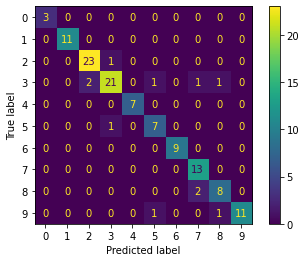

In [ ]:
plot_confusion_matrix(mlp, dev_data, dev_y)

In [ ]:
import pickle

# save
with open('mlp_isoc.pkl','wb') as f:
    pickle.dump(mlp,f)

In [ ]:
# load
with open('mlp_isoc.pkl', 'rb') as f:
    mlp = pickle.load(f)

In [ ]:
eval(model = GaussianNB())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.76      0.91      0.83        43
           2       0.86      0.66      0.75       112
           3       0.73      0.77      0.75        97
           4       0.92      0.90      0.91        39
           5       0.83      0.68      0.75        50
           6       0.76      0.93      0.84        28
           7       0.63      0.85      0.72        79
           8       0.86      0.91      0.88        54
           9       0.81      0.56      0.66        45

    accuracy                           0.78       557
   macro avg       0.82      0.82      0.81       557
weighted avg       0.79      0.78      0.78       557

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         4
           2       0.78      0.50      0.61        14
           3       0.60      0.69      0.64        13
           4       1.00 

In [ ]:
vc = VotingClassifier(estimators=[('f1', lr), ('f2', mlp)], voting='soft')
eval(model = vc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        43
           2       0.99      1.00      1.00       112
           3       1.00      0.99      0.99        97
           4       1.00      1.00      1.00        39
           5       1.00      1.00      1.00        50
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        79
           8       1.00      1.00      1.00        54
           9       1.00      1.00      1.00        45

    accuracy                           1.00       557
   macro avg       1.00      1.00      1.00       557
weighted avg       1.00      1.00      1.00       557

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       0.81      0.93      0.87        14
           3       1.00      0.69      0.82        13
           4       1.00 

In [ ]:
eval(AdaBoostClassifier())

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.00      0.00      0.00        28
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        22
           4       0.20      0.19      0.19        16
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        41
           7       0.56      0.67      0.61        46
           8       0.00      0.00      0.00        10
           9       0.17      0.11      0.13         9
          10       0.00      0.00      0.00        44
          11       0.25      0.07      0.11        14
          12       0.00      0.00      0.00        40
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00        37
          15       0.00      0.00      0.00        28
          16       0.00      0.00      0.00        14
          17       0.14    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
eval(model = RandomForestClassifier(max_depth=2, n_estimators=100, max_features=1))

              precision    recall  f1-score   support

           0       1.00      0.03      0.07        29
           1       0.00      0.00      0.00        28
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        41
           7       0.97      0.74      0.84        46
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00         9
          10       0.91      0.48      0.63        44
          11       0.00      0.00      0.00        14
          12       0.00      0.00      0.00        40
          13       0.00      0.00      0.00         5
          14       0.87      0.35      0.50        37
          15       0.00      0.00      0.00        28
          16       0.00      0.00      0.00        14
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
svc = SVC(gamma=1, C=0.25)
eval(svc)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.00      0.00      0.00        28
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00        12
           6       0.71      0.12      0.21        41
           7       0.00      0.00      0.00        46
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        14
          12       0.00      0.00      0.00        40
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00        37
          15       0.00      0.00      0.00        28
          16       0.00      0.00      0.00        14
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat